#Titanic Data EDA using seaborn

what is EDA?


Exploratory Data Analysis (EDA) is a method used to analyze and summarize datasets. Majority of the EDA techniques involve the use of graphs.

Titanic Dataset – 
It is one of the most popular datasets used for understanding machine learning basics. It contains information of all the passengers aboard the RMS Titanic, which unfortunately was shipwrecked. This dataset can be used to predict whether a given passenger survived or not. 

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [30]:
#loading data
titanic=pd.read_csv("train.csv")

Seaborn: 
It is a python library used to statistically visualize data. Seaborn, built over Matplotlib, provides a better interface and ease of usage. It can be installed using the following command, 
pip3 install seaborn

#Code: Printing data head  

In [22]:
# View first five rows of the dataset
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Code: Checking the NULL values 

In [23]:
titanic.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.

Features: The titanic dataset has roughly the following types of features:

* Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
* Binary: A subtype of categorical features, where the variable has only two categories. 
Eg: Sex (Male/Female)
Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
Eg. Pclass (1, 2, 3)
* Continuous: They can take upt having no order or priority. 
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
* Binary: A subtype of categorical features, where the variable has only two categories. 
Eg: Sex (Male/Female)
Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
Eg. Pclass (1, 2, 3)
* Continuous: They can take up any value between the minimum and maximum values in a column. 
Eg. Age, Fare
Count: They represent the count of a variable. 
Eg. SibSp, Parch
* Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.


#Code: Graphical Analysis 

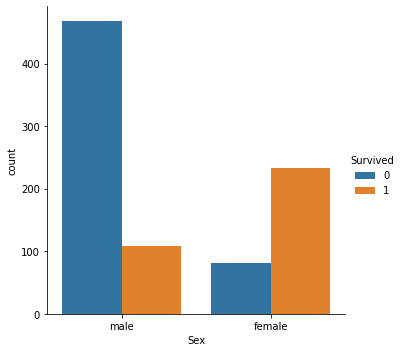

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)


Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

#Code : Pclass (Ordinal Feature) vs Survived 

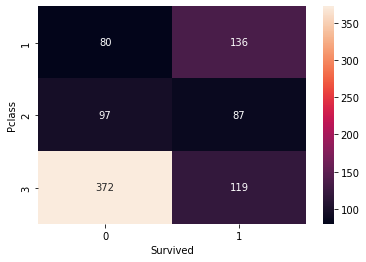

In [25]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

#Code : Age (Continuous Feature) vsSurvived  




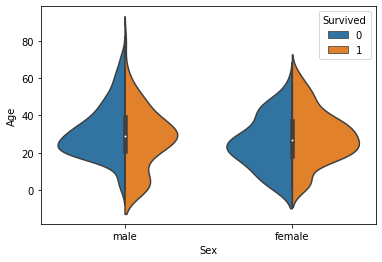

In [26]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)


This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

* Good for children.
* High for women in the age range 20-50.
* Less for men as the age increases.


Since Age column is important, the missing values need to be filled, either by using the Name column(ascertaining age based on salutation – Mr, Mrs etc.) or by using a regressor. 
After this step, another column – Age_Range (based on age column) can be created and the data can be analyzed again. 

#Code : Factor plot for Family_Size (Count Feature) and Family Size.  

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


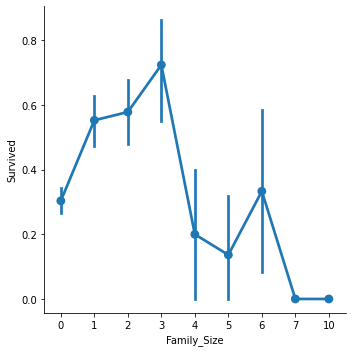

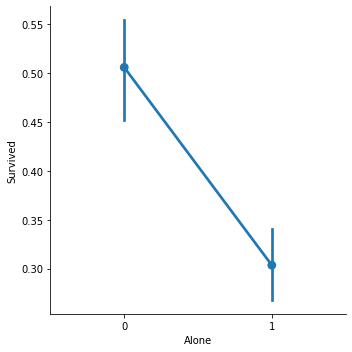

In [27]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']

# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)

# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)


Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations – 


* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decrease considerably.


Code : Bar Plot for Fare (Continuous Feature)  

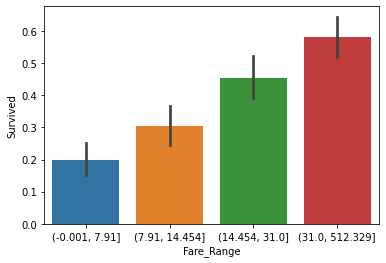

In [28]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic)



#Code: Categorical Count Plots for Embarked Feature  


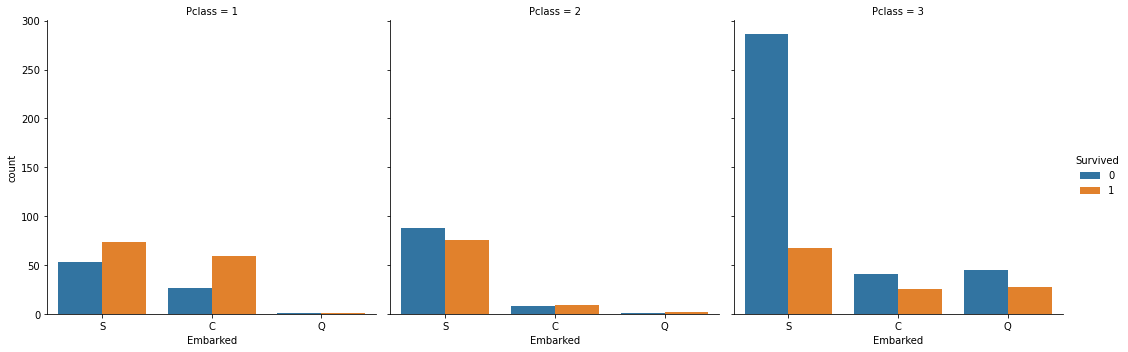

In [29]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic)



Some notable observations are: 

Majority of the passengers boarded from S. So, the missing values can be filled with S.
Majority of class 3 passengers boarded from Q.
S looks lucky for class 1 and 2 passengers compared to class 3.
Conclusion :  

* The columns that can be dropped are: 
  
   * PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. 
   *Age, Fare: Instead, the respective range columns are retained.
*The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described in this article.
*Once the EDA is completed, the resultant dataset can be used for predictions.






